# NOTEBOOK TITANIC

## Data engineering

In [146]:
#Importation our dataset and dowload libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('trainandtest.csv', delimiter=';')

In [147]:
#Definition of a new column 'Title' that keeps only titles in 'Name' column

data["Name"]= data["Name"].str.split(".", n = 1, expand = True) 
new = data["Name"].str.split(",", n = 1, expand = True) 
data["First Name"]= new[0]
data["Title"]= new[1]
data.drop(columns =["Name"], inplace = True)
data.drop(columns=["First Name"], inplace= True)

In [148]:
#Alternative way to deal with Title (not the one we pick for our modelization 
#(not the one we pick for our modelization,it decreases the accuracy)

#We first define a new column'Title' that keeps only titles in 'Name' column.
dataalt1=pd.read_csv('trainandtest.csv', delimiter=';')
dataalt1["Name"]= dataalt1["Name"].str.split(".", n = 1, expand = True) 
new = dataalt1["Name"].str.split(",", n = 1, expand = True) 
dataalt1["First Name"]= new[0]
dataalt1["Title"]= new[1]
dataalt1.drop(columns =["Name"], inplace = True)
dataalt1.drop(columns=["First Name"], inplace= True)

#We noticed that there are outliers titles such as 'Doctor', 'Reverant', 'Don' ...
#Let's affect wisely the outliers to existing titles.
#We create 4 types of 'Title' according to their sex
#their title and their age : 'Boy', 'Mr', 'Miss' & 'Mrs'
for i in range(dataalt1.Title.shape[0]) :
    if (dataalt1.Sex[i] == 0 and dataalt1.Age[i] < 18) : 
        dataalt1.Title[i] = "Boy" #We affect 'Boy' to male passengers who are under 18. 
    elif (dataalt1.Sex[i] == 0 and dataalt1.Age[i] >= 18) :
        dataalt1.Title[i] = "Mr" #We affect 'Mr'to male passengers who are over 18.
    elif (dataalt1.Sex[i] == 1 and dataalt1.Title[i] != "Mrs") :
        dataalt1.Title[i] = "Miss" 
        #We affect 'Miss' to female passengers whose Title are not Mrs.
    elif (dataalt1.Sex[i]== 1  and dataalt1.Title[i]!="Miss") : 
        dataalt1.Title[i] = "Mrs" #We affect 'Mrs'to female passengers whose Title are Miss.

        
#Numerisation of 'Title' column:
dataalt1["Title"]= dataalt1['Title'].map({'Mr': 1, 'Boy': 2, 'Mrs': 3,'Miss': 4})
dataalt1.Title.value_counts()

Series([], Name: Title, dtype: int64)

In [149]:
#Exploration of the 'family' column: 

def process_family():
   
    global data
# We create a new feature 'FamilySize' which corresponds to the number of family mumber 
#that traveled on the Titanic (including the passenger).
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    
    # We, then, create 3 new features related to 'FamilySize' : 'Singleton', 
    #'SmallFamily'& 'LargeFamily'
    data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0) 
    #Correponds to passenger who traveled alone
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0) 
    #Passengers who traveled with 1 to 3 family member. We set this as 'SmallFamily'
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5 <= s else 0) 
    #Passengers who traveled with more than 3 family member. We set this as 'LargeFamily'
    
  
    return data

data = process_family() #Apply the function to our dataset
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0,0


In [150]:
#Modification of 'Sex' feature and make it a dummy variable

data["Sex"] = pd.get_dummies(data["Sex"]) #0 if it's a male passenger, 1 if it's a woman.

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


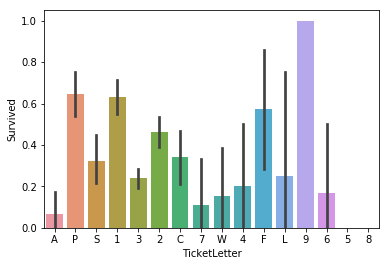

TicketLetter
3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: PassengerId, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
0,1,0.0,3,0,22.0,1,0,7.2500,NaN,S,Mr,2,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,C85,C,Mrs,2,0,1,0,0,0,1,0
2,3,1.0,3,1,26.0,0,0,7.9250,NaN,S,Miss,1,1,0,0,0,0,1,0
3,4,1.0,1,1,35.0,1,0,53.1000,C123,S,Mrs,2,0,1,0,0,0,1,0
4,5,0.0,3,0,35.0,0,0,8.0500,NaN,S,Mr,1,1,0,0,0,1,0,0


In [151]:
#Keep 'Tickets' with modifications and process it with dummies variables 

#'Tickets'column is to diverse to use it like this. To avoid the diveristy
#we are going to introduce new features that cointains some information of 'Tickets'column.

#We create a new feature 'TicketLetter':
data['TicketLetter'] = data['Ticket'].apply(lambda x : str(x)[0]) 
#We affect to 'TicketLetter'the first element (number or letter) of 'Ticket'.

#Plot 'TicketLetter'vs 'Survived'   
data.groupby(['TicketLetter'])['Survived'].mean().sort_values(ascending=False)
sns.barplot(x = 'TicketLetter', y='Survived', data=data)
df_count = data.groupby(['TicketLetter'],as_index=True)['PassengerId'].count().sort_values(ascending=False)

plt.show()

#We want to know which 'TicketLetter'appears most. 
data_count = data.groupby(['TicketLetter'],as_index=True)['PassengerId'].count().sort_values(ascending=False) #count how much time each different 'TicketLetter' appears through all passengers.
print(data_count)
#We notice that some 'TicketLetter'appear more frequently than other. 
#Only very few people have 'TicketLetter' equal to '9', '8', '5', 'L', '6', 'F', '7', '4', 'W' & 'A'. We set it to be 'Rare' category of ticket.
#Some passengers have 'TicketLetter' equal to 'C', 'P', 'S' & '1'. 
#We set it to be 'Frequent'category of ticket.
#Lot of passengers have 'TicketLetter' equal to '2'. 
#We set it to be 'Common'category of ticket.
#Most of the passengers have 'TicketLetter'equal to '3'. 
#So, we set it to be 'Commonest' category of ticket.
#Thus, we create a new feature 'TicketCategory' which indicates the frequency of 'TicketLetter' passenger.

def filter_ticket(x):
    if x in ['9', '8', '5', 'L', '6', 'F', '7', '4', 'W', 'A']: 
        return 'Rare'
    elif x in ['C', 'P', 'S', '1']:
        return 'Frequent'
    elif x == '2':
        return 'Common'
    elif x == '3':
        return 'Commonest'


data['TicketCategory'] = data['TicketLetter'].apply(filter_ticket)

#Tranform 'TicketCategory' as dummy variables:
def simplify_ticket(data):
    data = pd.get_dummies(data, columns=['TicketCategory'])
    data = data.drop(['TicketLetter', 'Ticket'], axis=1) 
    #Delete 'TicketLetter' & 'Ticket' columns
    return data

data = simplify_ticket(data)
data.head()

## Fill missing values

In [152]:
#Round the age to the nearest integer

data["Age"]=round(data["Age"])

#We notice that 'Age' column has missing values. 
#Intuitively, we said that 'Pclass' column can give us information about the age.
#Filling of the missing values of age with combination of 'Sex'and 'Pclass'column'.

guess_ages = np.zeros((2,3)) 
#create an array full with 0 that we will fill in with the following code.

for i in range(0, 2):
    for j in range(0, 3):
        guess_data = data[(data['Sex'] == i) & (data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median() 
        #take the median age of passengers with same sex and Pclass
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5 #fill the array with the median age
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j] #fill missing values with the correspomding Pclass and Sex median age 
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset

#We apply the funtcion to our dataset
data = wrangle_age(data)

In [153]:
#Deal with Cabin and fill its missing values

#'Cabin' column is too diverse. So, we first 'simplify'it, then we fill missing values.

#Creation a Column 'CabinLetter' which corresponds to the Letter of the Cabin the passenger were seated.
data['CabinLetter'] = data['Cabin'].astype(str).str[0] 
#We fill 'CabinLetter' with the first letter of 'Cabin'

#Creation a Column 'CabinNumber' which corresponds to the first number of the Cabin the passenger were seated.
data.loc[:, 'CabinNumber']=0

for i in range(data['CabinNumber'].shape[0]):
    data['CabinNumber'][i]=data.Cabin.str[1][i]


#Filling of the missing Values of CabinNumber by replacing it directly by 0, 
#indeed, we noticed that only 25% of the passengers whose cabin was a missing value survived.
data.CabinNumber = data.CabinNumber.fillna('0')

#Filling of the missing Values of CabinLetter by replacing it directly by U, 
#indeed, we noticed that only 25% of the passengers whose cabin was a missing value survived.
for i in range(data['CabinLetter'].shape[0]):
    if (data['CabinLetter'][i]=='n'):
        data['CabinLetter'][i]='U'



/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [154]:
#Alternative way to deal with Cabin (not the one we pick for our modelization)

#We remove the 'Cabin' column and create a 'Deck' column 
#by only keeping the the letter of the passengers' Cabins.
dataalt=pd.read_csv('trainandtest.csv', delimiter=';')
dataalt['Deck'] = dataalt['Cabin'].astype(str).str[0]

#We notice that there is only 1 value with 'Deck'='T' at row 339. 
#No sense, so we put a NaN instead, say 'n'.
dataalt['Deck'][339]='n'


plt.bar(dataalt['Deck'],dataalt['Pclass'])

#To fill the 'Deck' missing values, we affected the cabins missing values of Class 1 passenger 
#to deck A, B and C;
#The cabins missing values of Class 2 passenger to deck D.
#The cabins missing values of Class 3 passenger to deck E, F and G. 
#Indeed, we noticed that in general, passengers from Class 1 were in Deck A, B and C; 
#from Class 2 in Deck D; from Class 3 in E, F and G.
class1=['A','B','C']
class2=['D']
class3=['E','F','G']

for i in range(dataalt['Deck'].shape[0]):
    if (dataalt['Deck'][i]=='n'):
        if (dataalt['Pclass'][i]==1) :
            dataalt['Deck'][i]=np.random.choice(class1)
        elif (dataalt['Pclass'][i]==2) :
            dataalt['Deck'][i]=np.random.choice(class2)
        else :
            dataalt['Deck'][i]=np.random.choice(class3)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarni

In [155]:
#Filling of the Embarked missing values 

data[pd.isnull(data["Embarked"])]

(data["Embarked"]).value_counts("S")*100
# We notice that 70% of passengers embarked in Southampton. 
#we're going to affect by Naive Method, S to the two missing values.
data.Embarked = data.Embarked.fillna("S")

In [156]:
#Filling of the fares missing values by picking the median

data[pd.isnull(data["Fare"])]

data['Fare'].iloc[1043]= data['Fare'][data['Pclass'] == 3].dropna().median()
print(data['Fare'].iloc[1043])

8.05


/Users/jennifervial/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Data Vizualisation

In [182]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()


# Categorical/Ordinal Data Plot
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()
    
survival_palette = {0: "black", 1: "orange"} # Color map for visualization


#Categorise Age and Fare
age_bins = [0,15,35,45,60,200]
age_labels = ['15-','15-35','35-45','40-60','60+']
fare_bins = [0,10,30,60,999999]
fare_labels = ['10-','10-30','30-60','60+']

def get_title(data, feature_name):
    return data[feature_name].map(lambda name:name.split(',')[1].split('.')[0].strip())

for dataset in data:
    data['AgeRange'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
    data['FareRange'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
  

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


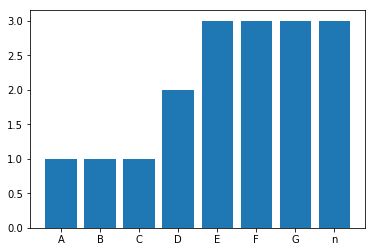

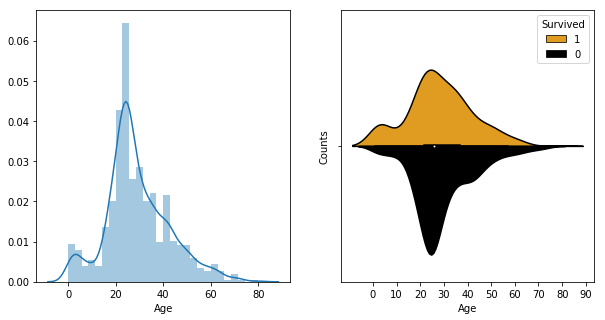

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


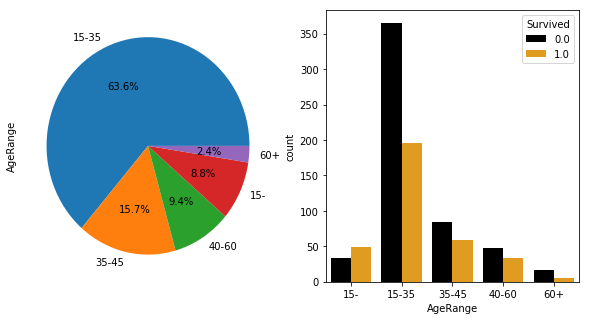

In [184]:
#Survival by Age range
age_set_nonan = data[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))
cat_plot(data, 'AgeRange','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


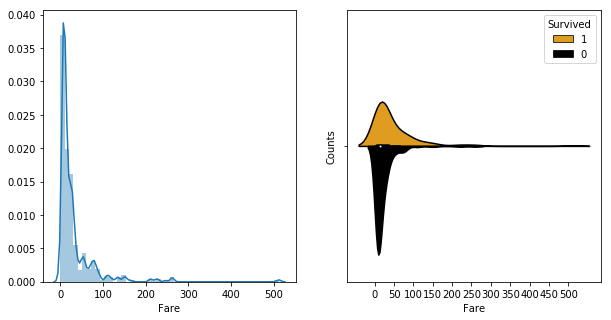

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


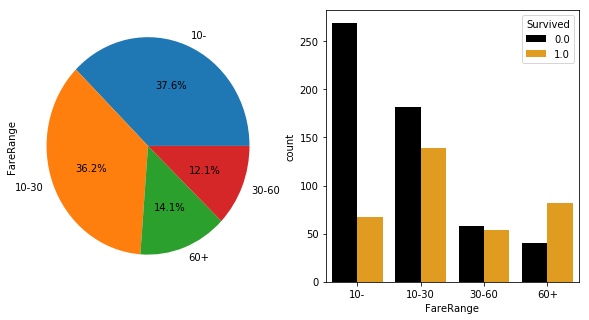

In [185]:
#Survival by Fare range 
fare_set = data[['Fare','Survived']].copy() 
#Copy dataframe so method won't leave Counts column in train_set
fare_set_nonan = data[['Fare','Survived']].copy().dropna(axis=0)
cont_plot(fare_set_nonan, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))
cat_plot(data, 'FareRange','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


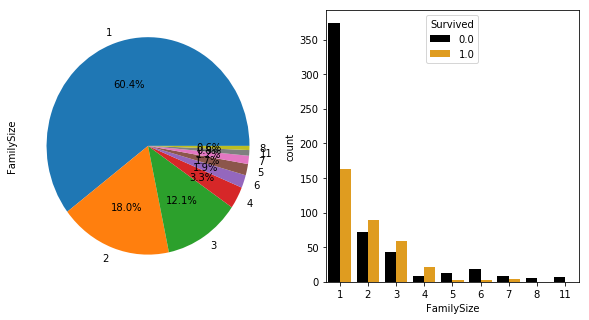

In [186]:
#Survival by Family Size
cat_plot(data, 'FamilySize','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


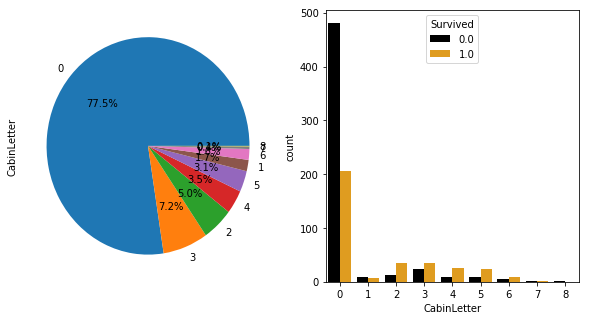

In [187]:
#Survival by Deck distribution
cat_plot(data, 'CabinLetter','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


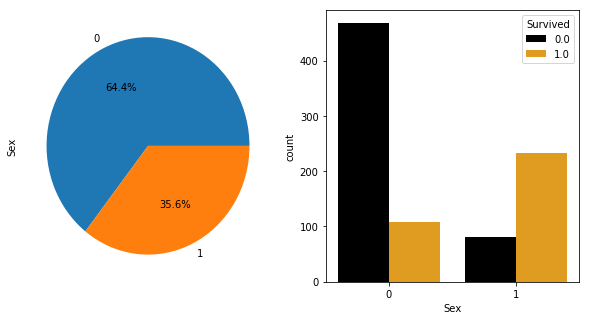

In [188]:
#Survival by Gender
cat_plot(data, 'Sex','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


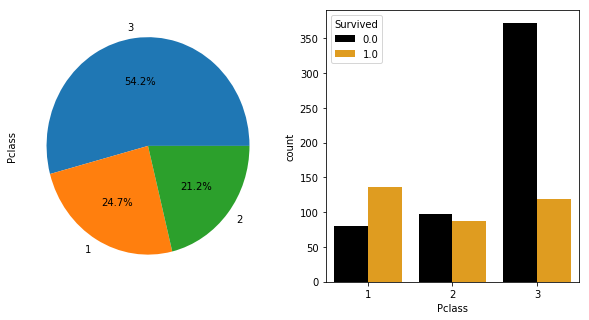

In [189]:
#Survival by Ticket Class
cat_plot(data, 'Pclass','Survived', survival_palette, )

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


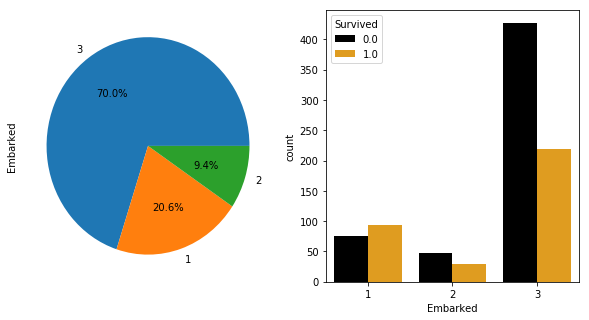

In [190]:
#Survival by Embarkment port
emb_set_nonan = data[['Embarked','Survived']].copy().dropna(axis=0)
cat_plot(data, 'Embarked','Survived', survival_palette)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


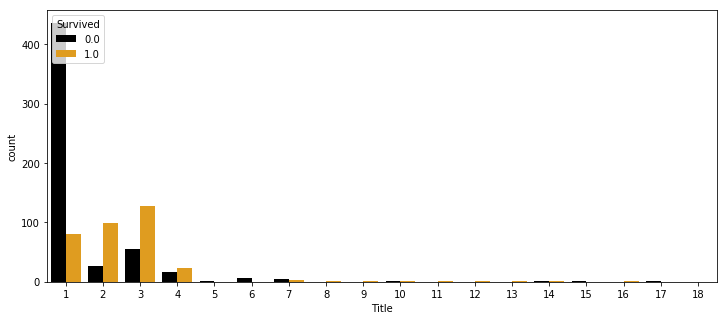

In [191]:
#Survival by Title
fig, axis = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='Title', hue='Survived', data=data,
palette=survival_palette,ax=axis)
plt.show()



/Users/jennifervial/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


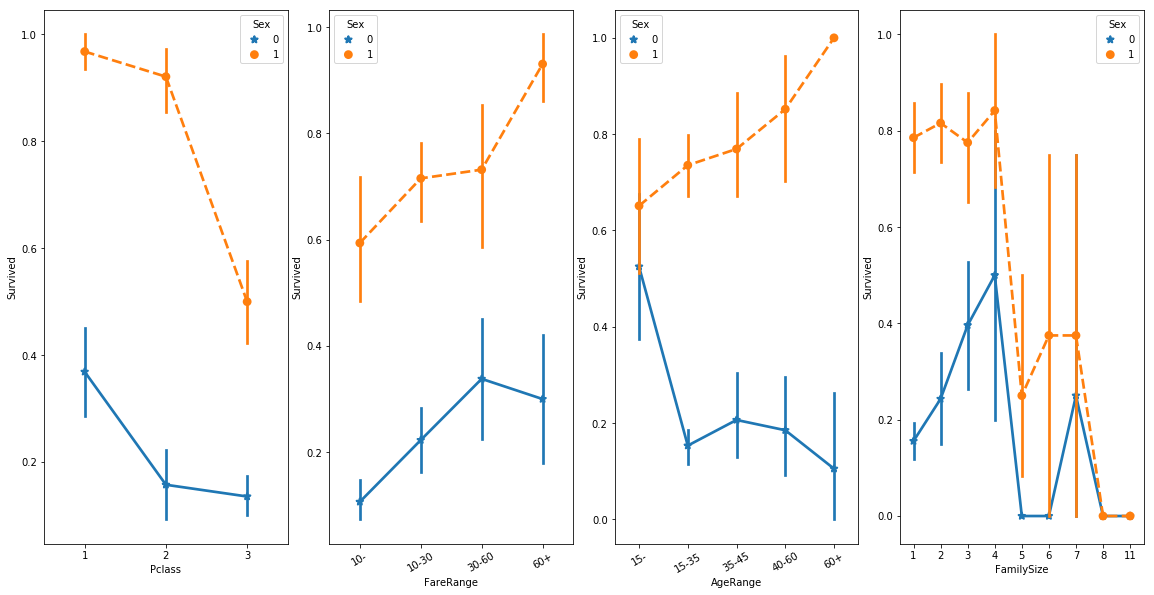

In [135]:
#more side-by-side comparisons
fig, (maxis1, maxis2, maxis3, maxis4) = plt.subplots(1, 4, figsize=(16,8))
fig.tight_layout() # increase space between plots

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data,
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does fair factor with sex & survival compare
sns.pointplot(x="FareRange", y="Survived", hue="Sex", data=data,
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)
maxis2.set_xticklabels(maxis2.get_xticklabels(), rotation = 30)

#how does age factor with sex & survival compare
sns.pointplot(x="AgeRange", y="Survived", hue="Sex", data=data,
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis3)
maxis3.set_xticklabels(maxis3.get_xticklabels(), rotation = 30)

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data,
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis4)


plt.show()

## Numerization of our features

In [157]:
#Organization of columns

inserted_cols = ['PassengerId', 'Survived','Sex', 'Age', 'Title','Relatives','Pclass','CabinNumber','CabinLetter','Embarked','Fare']
cols = ([col for col in inserted_cols if col in data] 
        + [col for col in data if col not in inserted_cols]) #Reogarnize columns to be more readable. 
data = data[cols]
data.head()

,PassengerId,Survived,Sex,Age,Title,Pclass,CabinNumber,CabinLetter,Embarked,Fare,...,Parch,Cabin,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
0,1,0.0,0,22,Mr,3,0,U,S,7.2500,...,0,NaN,2,0,1,0,0,0,0,1
1,2,1.0,1,38,Mrs,1,8,C,C,71.2833,...,0,C85,2,0,1,0,0,0,1,0
2,3,1.0,1,26,Miss,3,0,U,S,7.9250,...,0,NaN,1,1,0,0,0,0,1,0
3,4,1.0,1,35,Mrs,1,1,C,S,53.1000,...,0,C123,2,0,1,0,0,0,1,0
4,5,0.0,0,35,Mr,3,0,U,S,8.0500,...,0,NaN,1,1,0,0,0,1,0,0


In [158]:
#Numerization of our features 

data['Title'] = data['Title'].map({' Mr': 1, ' Mrs': 2, ' Miss': 3, ' Master': 4, ' Don': 5, ' Rev': 6, ' Dr': 7,' Mme':8,' Ms':9,' Major':10,' Lady':11,' Sir':12,' Mlle':13,' Col':14,' Capt':15,' the Countess':16,' Jonkheer':17,' Dona':18 })
data['Embarked'] = data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
data['CabinLetter']=data['CabinLetter'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':0})
data['CabinNumber'] = data['CabinNumber'].map({'0': 0, 8.0:8, 1.0:1,4.0 :4, 6.0:6, 5.0:5, 2.0:2, 7.0:7, 3.0:3, ' ': 0, '2': 2, '3':3, '5':5, '1':1, '4':4,'8':8, '7':7,'6':6, '9':9})
data.head()

,PassengerId,Survived,Sex,Age,Title,Pclass,CabinNumber,CabinLetter,Embarked,Fare,...,Parch,Cabin,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
0,1,0.0,0,22,1,3,0,0,3,7.2500,...,0,NaN,2,0,1,0,0,0,0,1
1,2,1.0,1,38,2,1,8,3,1,71.2833,...,0,C85,2,0,1,0,0,0,1,0
2,3,1.0,1,26,3,3,0,0,3,7.9250,...,0,NaN,1,1,0,0,0,0,1,0
3,4,1.0,1,35,2,1,1,3,3,53.1000,...,0,C123,2,0,1,0,0,0,1,0
4,5,0.0,0,35,1,3,0,0,3,8.0500,...,0,NaN,1,1,0,0,0,1,0,0


In [159]:
data.drop(columns=["SibSp"], inplace= True)
data.drop(columns=["Parch"], inplace= True)

In [160]:
data.drop(columns=["Cabin"], inplace= True)

In [161]:
data.head()

,PassengerId,Survived,Sex,Age,Title,Pclass,CabinNumber,CabinLetter,Embarked,Fare,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
0,1,0.0,0,22,1,3,0,0,3,7.2500,2,0,1,0,0,0,0,1
1,2,1.0,1,38,2,1,8,3,1,71.2833,2,0,1,0,0,0,1,0
2,3,1.0,1,26,3,3,0,0,3,7.9250,1,1,0,0,0,0,1,0
3,4,1.0,1,35,2,1,1,3,3,53.1000,2,0,1,0,0,0,1,0
4,5,0.0,0,35,1,3,0,0,3,8.0500,1,1,0,0,0,1,0,0


## Check-out of the best features 

Feature selection has not been implemented in our models because we have few features, but we did that in order to check which features were more relevant.

In [162]:
data2=data
dataFeatures=data2[data2['Survived'].notnull()]
dataFeatures_test=data2[data2['Survived'].isnull()]

array = dataFeatures.values
print(array)

inserted_cols = ['PassengerId','Sex', 'Age', 'Title','Pclass','CabinNumber','CabinLetter','Embarked','Fare','FamilySize','Singleton','SmallFamily','LargeFamily','TicketCategory_Common','TicketCategory_Commonest','TicketCategory_Frequent','TicketCategory_Rare','Survived']
cols = ([col for col in inserted_cols if col in dataFeatures] 
        + [col for col in dataFeatures if col not in inserted_cols])
dataFeatures = dataFeatures[cols]

inserted_cols = ['PassengerId','Sex', 'Age', 'Title','Pclass','CabinNumber','CabinLetter','Embarked','Fare','FamilySize','Singleton','SmallFamily','LargeFamily','TicketCategory_Common','TicketCategory_Commonest','TicketCategory_Frequent','TicketCategory_Rare','Survived']
cols = ([col for col in inserted_cols if col in dataFeatures_test] 
        + [col for col in dataFeatures_test if col not in inserted_cols])
dataFeatures = dataFeatures[cols]
dataFeatures_test=dataFeatures_test[cols]

[[  1.   0.   0. ...   0.   0.   1.]
 [  2.   1.   1. ...   0.   1.   0.]
 [  3.   1.   1. ...   0.   1.   0.]
 ...
 [889.   0.   1. ...   0.   0.   1.]
 [890.   1.   0. ...   0.   1.   0.]
 [891.   0.   0. ...   1.   0.   0.]]


In [163]:
X_testFeature=dataFeatures_test.loc[:,dataFeatures_test.columns!= "Survived"]
X_testFeature.head()

,PassengerId,Sex,Age,Title,Pclass,CabinNumber,CabinLetter,Embarked,Fare,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
891,892,0,34,1,3,0,0,2,7.8292,1,1,0,0,0,1,0,0
892,893,1,47,2,3,0,0,3,7.0000,2,0,1,0,0,1,0,0
893,894,0,62,1,2,0,0,2,9.6875,1,1,0,0,1,0,0,0
894,895,0,27,1,3,0,0,3,8.6625,1,1,0,0,0,1,0,0
895,896,1,22,2,3,0,0,3,12.2875,3,0,1,0,0,1,0,0


In [164]:
X = array[:,0:17]
Y = array[:,17]

In [165]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [166]:
#Select the 10 best features 
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:11,:])

[2.076e+02 1.140e+01 7.901e-01 2.084e+00 2.109e+00 7.409e+00 3.610e+01
 3.777e+01 7.070e+00 8.066e+02 9.915e-01 4.172e-01 1.709e+00 8.771e-01
 1.905e+01 3.133e+01 3.362e+01]
[[ 1.     0.     3.     0.     0.     3.     7.25   0.     0.     0.   ]
 [ 2.     1.     1.     8.     3.     1.    71.283  0.     0.     1.   ]
 [ 3.     1.     3.     0.     0.     3.     7.925  0.     0.     1.   ]
 [ 4.     1.     1.     1.     3.     3.    53.1    0.     0.     1.   ]
 [ 5.     0.     3.     0.     0.     3.     8.05   0.     1.     0.   ]
 [ 6.     0.     3.     0.     0.     2.     8.458  0.     1.     0.   ]
 [ 7.     0.     1.     4.     5.     3.    51.862  0.     0.     1.   ]
 [ 8.     0.     3.     0.     0.     3.    21.075  0.     1.     0.   ]
 [ 9.     1.     3.     0.     0.     3.    11.133  0.     1.     0.   ]
 [10.     1.     2.     0.     0.     1.    30.071  1.     0.     0.   ]
 [11.     1.     3.     6.     7.     3.    16.7    0.     0.     1.   ]]


In [167]:
#Next, you will implement Recursive Feature Elimination which is a type of wrapper feature selection method.
#It uses the model accuracy to identify which attributes 
#(and combination of attributes) contribute the most to predicting the target attribute.
#Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [168]:
#You will use RFE with the Logistic Regression classifier to select the top 3 features. 
#The choice of algorithm does not matter too much as long as it is skillful and consistent.
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False  True False False False  True False False  True False  True  True
  True  True  True  True  True]
Feature Ranking: [8 1 2 7 5 1 4 3 1 6 1 1 1 1 1 1 1]


We can notice that 10 features which seem to be the most relevant to predict who survived or not according to RFE calibrated with a Logistic Regression : Sex, Cabin Number, fare, ticket and family parameters. It's not suprising to the extend that women were privileged to be secured. The Cabin refers to the room of the passengers. If they were well-located in the boat they would have survived. The fare refers to the amount a passenger spent on its tickets. The politic was to rescue in first position the most loyal customers. Those who had family onboard were looking for their siblings and then weren't the first one to board the canoes as oppose to those who were alone.

In [169]:
#You will use RFE with the Ridge Regression classifier to select the top 4 features.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.0 * X0 + -0.003 * X1 + 0.001 * X2 + 0.0 * X3 + 0.0 * X4 + 0.005 * X5 + 0.0 * X6 + -0.0 * X7 + 0.003 * X8 + 0.0 * X9 + -0.003 * X10 + -0.006 * X11 + -0.002 * X12 + 0.008 * X13 + -0.955 * X14 + -0.962 * X15 + -0.955 * X16


In [170]:
#Divide data test and train 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=10)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

#use the same Random Forest classifier that we used to evaluate performance of PCA-reduced algorithms.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  


[[165   0]
 [ 14   0]]
Accuracy0.9217877094972067


/Users/jennifervial/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


We can notice that the Random forest classifier combined with a LDA provides 92% of accuracy. We are to include it in our Modelization, nevertheless, it is highly likely that we are faced with overfitting.  

## Modelization 

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

data3=data
dataFeatures=data3[data3['Survived'].notnull()]
Y_dataFeatures_train = dataFeatures['Survived']
X_dataFeatures_train = dataFeatures.loc[:,dataFeatures.columns!='Survived']
dataFeatures_test=data2[data2['Survived'].isnull()]
Y_dataFeatures_test = dataFeatures_test['Survived']
X_dataFeatures_test = dataFeatures_test.loc[:,dataFeatures_test.columns!= "Survived"]


lda = LDA(n_components=17)  
X_train = lda.fit_transform(X_dataFeatures_train, Y_dataFeatures_train)  
X_test = lda.transform(X_dataFeatures_test)  

#use the same Random Forest classifier that we used to evaluate performance of PCA-reduced algorithms.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_dataFeatures_train, Y_dataFeatures_train)  


X_testFeature = lda.transform(X_dataFeatures_test)  

resultlda = classifier.predict(X_dataFeatures_test).astype(int)

FINAL4 = pd.DataFrame({
        "PassengerId": dataFeatures_test["PassengerId"].astype(int),
        "Survived": resultlda.astype(int)
    })
FINAL4.to_csv('LDA.csv',sep=',',index=False)

/Users/jennifervial/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [173]:
#Definition the training and test dataset 

data_train=data[data['Survived'].notnull()]
data_test=data[data['Survived'].isnull()]
data_test.columns = ['PassengerId','Survived','Sex','Age','Title','Pclass','CabinNumber','CabinLetter','Embarked','Fare','FamilySize','Singleton','SmallFamily','LargeFamily','TicketCategory_Common','TicketCategory_Commonest','TicketCategory_Frequent','TicketCategory_Rare']


In [174]:
#Definition of our Training and Test variables 

Y_train = data_train['Survived']
Y_test = data_test['Survived']
X_train = data_train.loc[:,data_train.columns!='Survived']
X_test = data_test.loc[:,data_test.columns!= "Survived"]


In [175]:

from sklearn.model_selection import train_test_split
X_training,X_validation,Y_training,Y_validation = train_test_split(X_train,Y_train, test_size = 0.3, random_state = 21)


In [176]:
X_training.head(15)

,PassengerId,Sex,Age,Title,Pclass,CabinNumber,CabinLetter,Embarked,Fare,FamilySize,Singleton,SmallFamily,LargeFamily,TicketCategory_Common,TicketCategory_Commonest,TicketCategory_Frequent,TicketCategory_Rare
241,242,1,22,3,3,0,0,2,15.5000,2,0,1,0,0,1,0,0
734,735,0,23,1,2,0,0,3,13.0000,1,1,0,0,1,0,0,0
581,582,1,39,2,1,6,3,1,110.8833,3,0,1,0,0,0,1,0
456,457,0,65,1,1,3,5,3,26.5500,1,1,0,0,0,0,1,0
118,119,0,24,1,1,5,2,1,247.5208,2,0,1,0,0,0,1,0
621,622,0,42,1,1,1,4,3,52.5542,2,0,1,0,0,0,1,0
162,163,0,26,1,3,0,0,3,7.7750,1,1,0,0,0,1,0,0
46,47,0,25,1,3,0,0,2,15.5000,2,0,1,0,0,1,0,0
709,710,0,25,4,3,0,0,1,15.2458,3,0,1,0,1,0,0,0
647,648,0,56,14,1,2,1,1,35.5000,1,1,0,0,0,0,1,0


In [177]:
from sklearn import preprocessing

train_test = pd.concat([X_training, X_test, X_validation], ignore_index=True)
train_test_normalized = preprocessing.scale(train_test)
X_training_normalized = train_test_normalized[:len(X_training), :]
X_test_normalized = train_test_normalized[len(X_training):len(X_training) + len(X_test), :]
X_validation_normalized = train_test_normalized[len(X_training) + len(X_test):, :]

## SVM model

In [178]:
#Importation of the libraries

from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

#Definition of our SVM parameters

svm_params = {
    'C' : [0.1, 0.3, 0.8, 0.9, 1.0, 2.0],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol' : [1e-3, 1e-4],
    'degree' : [2, 3, 4, 5],
    'random_state' : [21]
}

cross_validation = StratifiedKFold(n_splits=5)

#Definition of accuracy scorer to target the best accuracy 
#Optimization of our parameters thanks to a Grid Search 
#Call the SVC with the best fit to our data 

acc_scorer = make_scorer(accuracy_score)
svc = SVC()
svc_classifiers = GridSearchCV(svc, svm_params, scoring=acc_scorer, n_jobs=-1, cv=cross_validation)
svc_classifiers = svc_classifiers.fit(X_training_normalized, Y_training)

svc_best = svc_classifiers.best_estimator_
svc_best = svc_best.fit(X_training_normalized, Y_training)





svc_model = {
    'Name' : 'SVC', 
    'CVScore' : svc_classifiers.best_score_, 
    'CVStd' : svc_classifiers.cv_results_['std_test_score'][svc_classifiers.best_index_],
    'Result_train' : svc_best.predict(X_training_normalized),
    'Result_test' : svc_best.predict(X_test_normalized),
    'Model' : svc_best
}


#Print the optimized SVM model 


best_idx = svc_classifiers.best_index_
print('Best model - avg:', 
      svc_model['CVScore'], 
      '+/-', 
      svc_model['CVStd'])
print()
print(svc_classifiers.best_estimator_)

Best model - avg: 0.826645264847512 +/- 0.01858164744530787

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=21, shrinking=True,
  tol=0.001, verbose=False)


In [179]:
#Make our prediction on the test set with the SVM model

Y_pred = svc_best.predict(X_test_normalized)


FINAL = pd.DataFrame({
        "PassengerId": data_test["PassengerId"].astype(int),
        "Survived": Y_pred.astype(int)
    })



FINAL.to_csv('predictionSVM41.csv',sep=',',index=False)



## Random Forest model

In [180]:
#Importation of the libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold



#Definition and optimization of our Random Forest Classifier thanks to a GridSearchCV 
#that optimizes our parameters

rf = RandomForestClassifier()
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X_train, Y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train, Y_train)





#Make our prediction on the test set with the Random Forest model
    
output = model.predict(X_test).astype(int)


FINAL2 = pd.DataFrame({
        "PassengerId": data_test["PassengerId"].astype(int),
        "Survived": output.astype(int)
    })
FINAL2.to_csv('predictionRFtest41.csv',sep=',',index=False)



In [181]:
#Importation of the libraries

from sklearn.neighbors import KNeighborsClassifier

#Definition of our KNN model 

param_grid = {"n_neighbors":np.arange(1,50)}
knn =  KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid, cv=10)
knn_cv.fit(X_training,Y_training)
knn_cv.best_params_
knn_cv.best_score_

result = knn_cv.predict(X_test).astype(int)
resultvalid=knn_cv.predict(X_validation).astype(int)

#Make our prediction on the test set with the KNN model

FINAL3 = pd.DataFrame({
        "PassengerId": data_test["PassengerId"].astype(int),
        "Survived": result.astype(int)
    })
FINAL3.to_csv('predictionKNN41.csv',sep=',',index=False)

